# 1. Data Preprocessing and Cleaning:

In [95]:
#Preprocessing Statements 
import numpy as np
import pandas as pd #for data reading from csv and data preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from flask import Flask, request, jsonify
from plotly.subplots import make_subplots
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder, StandardScaler #scaling and encoding
from sklearn.model_selection import train_test_split #splitting the data for trainin gand splitting
app = Flask(__name__)


In [14]:
data = pd.read_csv('D:\SunBase Data Intern\customer_churn_large_dataset.csv')
data = pd.DataFrame(data)
data = data.drop(columns=['Name', 'CustomerID'])
data.head()
# print(data.shape)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [15]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=data['Gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=data['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

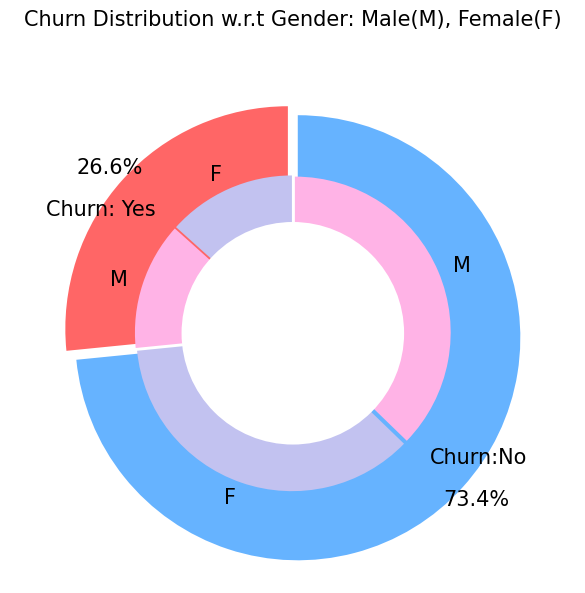

In [16]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [17]:
data.isnull().sum()
#There are no missing vales in the data

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

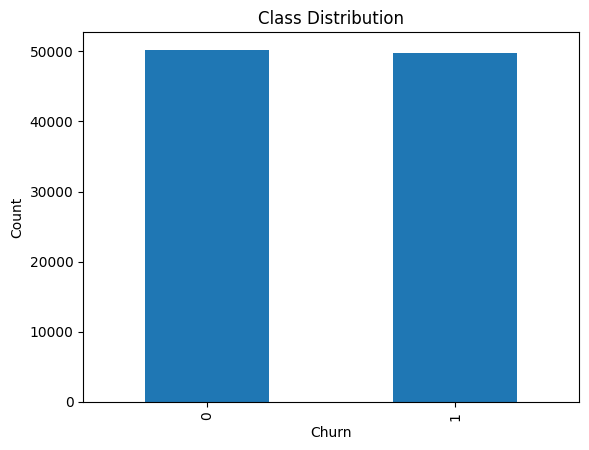

In [18]:
#Checking the balancing of data 
data['Churn'].value_counts().plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [19]:
#Encoding for Categorical values
# Encode categorical variables (e.g., gender, location)
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Location'] = label_encoder.fit_transform(data['Location'])

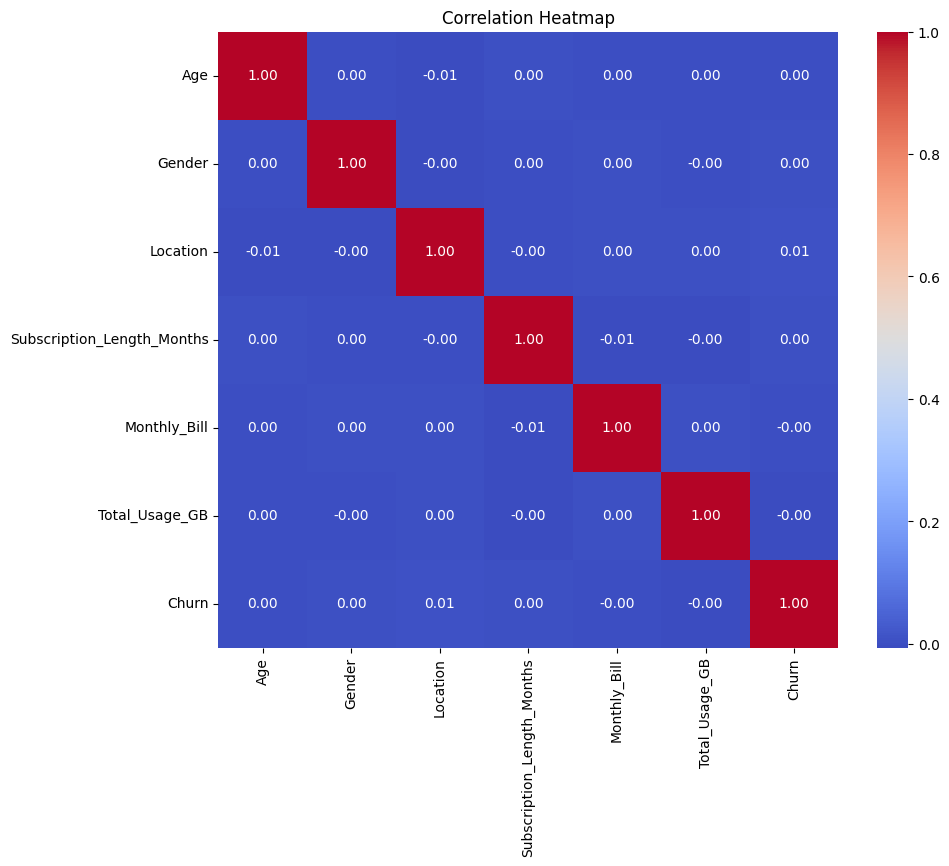

In [20]:
# Calculate correlations
correlation_matrix = data.corr()

# Plot a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



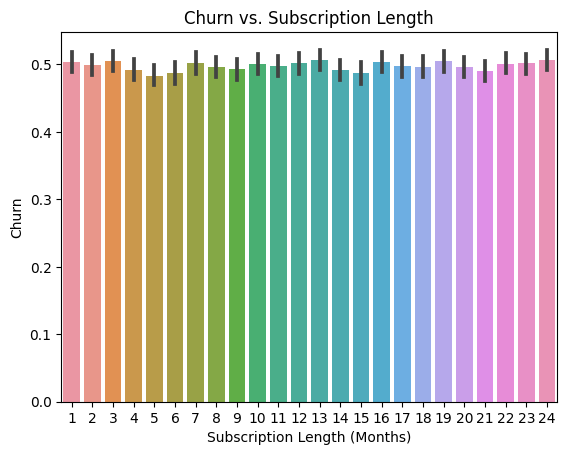

In [67]:
sns.barplot(x="Subscription_Length_Months", y="Churn", data=data)
plt.xlabel("Subscription Length (Months)")
plt.ylabel("Churn")
plt.title("Churn vs. Subscription Length")
plt.show()

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



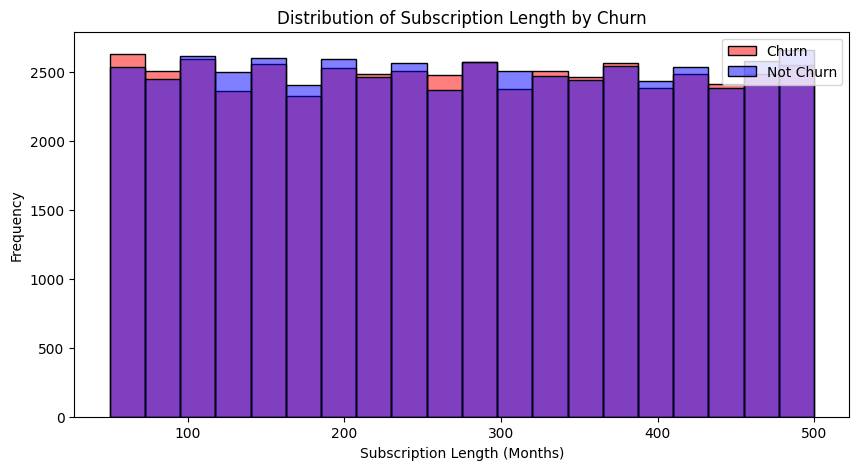

In [68]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data[data["Churn"] == 1], x="Total_Usage_GB", label="Churn", color="red", alpha=0.5, bins=20)
sns.histplot(data=data[data["Churn"] == 0], x="Total_Usage_GB", label="Not Churn", color="blue", alpha=0.5, bins=20)
plt.xlabel("Subscription Length (Months)")
plt.ylabel("Frequency")
plt.title("Distribution of Subscription Length by Churn")
plt.legend()
plt.show()

In [69]:
# Spliting data into features (X) and target (y)
X = data.drop(columns =['Churn'], axis=1)
y = data['Churn']

In [85]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
76513,25,1,2,13,98.13,468
60406,54,0,1,2,71.90,383
27322,32,1,0,20,65.65,427
53699,61,0,1,12,83.20,64
65412,70,0,4,5,41.93,99


In [86]:
# # Standardize numerical features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# 2. Feature Engineering:

In [87]:
data['Total_Bill'] = data['Subscription_Length_Months']*data['Monthly_Bill']
data.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Bill
0,63,1,2,17,73.36,236,0,1247.12
1,62,0,4,1,48.76,172,0,48.76
2,24,0,2,5,85.47,460,0,427.35
3,36,0,3,3,97.94,297,1,293.82
4,46,0,3,19,58.14,266,0,1104.66


In [88]:
# Create a random forest classifier (you can replace this with your preferred model)
rf_classifier = RandomForestClassifier(
    n_estimators=100,  # You can adjust the number of trees
    max_depth=3,    # You can limit the depth of each tree (None means no limit)
    min_samples_split=5,
    min_samples_leaf=5,
    max_features='sqrt',  # You can try different values like 'sqrt', 'log2', or an integer
    # random_state=42
)

# Create an RFE selector with the classifier and the number of features to select
# In this example, we're selecting the top 2 features.
rfe = RFE(estimator=rf_classifier, n_features_to_select=2)

# Fit RFE to the data
rfe.fit(X_train, y_train)

# Get the selected feature indices
selected_features = X.columns[selected_feature_indices]

# Filter the selected features using boolean indexing
selected_features = X.columns[selected_feature_indices]
# Print the selected features
print("Selected features:")
print(selected_features)

Selected features:
Index(['Monthly_Bill', 'Total_Usage_GB'], dtype='object')


# 3. Model Selection and Optimization:

In [90]:
# Define a Random Forest classifier with hyperparameters
# rf_classifier = RandomForestClassifier(
#     n_estimators=100,  # You can adjust the number of trees
#     max_depth=3,    # You can limit the depth of each tree (None means no limit)
#     min_samples_split=5,
#     min_samples_leaf=5,
#     max_features='sqrt',  # You can try different values like 'sqrt', 'log2', or an integer
#     # random_state=42
# )

# Fit the best model to the training data
rf_classifier.fit(X_train, y_train)

# Evaluate the best model on the test data
test_accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy on the test set:", test_accuracy)

Accuracy on the test set: 0.5040333333333333


# Deployement


In [97]:
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()

    # Preprocess the incoming data
    df = pd.DataFrame(data)
    df['Gender'] = label_encoder.transform(df['Gender'])
    df['Location'] = label_encoder.transform(df['Location'])
    df = scaler.transform(df)

    # Make predictions using the deployed model
    predictions = model.predict(df)

    # Return predictions as JSON
    return jsonify({'predictions': predictions.tolist()})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


AssertionError: View function mapping is overwriting an existing endpoint function: predict